### Fitting to the sidelobes

### Goal:
Extract the plate scale and effective incident spectrum from the sidelobes.

### Ideas:
Forward model everything? Not going to be efficient since generating a single image takes ~100 seconds with such a large FoV. And splitting the image up into 4 smaller squares around the sidelobes doesn't help. Neither does doing a tiny stamp for each wavelength. Tested using poppy. Perhaps a switch is needed to tell it to use an MFT or something?

Instead, might have to approximate PSF as an Airy pattern and see how far we can get. Once something works, can always swap in the image generation infrastructure for something else. Airy pattern model takes ~1s per image.

Here I'm going to write the results from a sequence of simulations as: \
Quantity: mean_value +/- stddev. \
Error: 1e6 x (mean_value-true_value)/true_value +/- 1e6 x stddev/true_value (ppm).\
Note that since I'm showing mean and stddev, the uncertainty given for the "Error" (i.e. difference between the measured and true value) is the scatter not the SEM and so we need to divide by sqrt(n_images) when evaluating whether it gave an incorrect estimate. I'm just showing the scatter because that's the important quantity we're trying to evaluate.


### Results:
(10 ims)

With no jitter and 35000 peak photons and 10% of light into sidelobes:\
Plate scale: 0.155999 +/- 0.000002.  Error: 4.91 +/- 10.91ppm\
PSF width: 8.07898 +/- 0.00146939\
Teff: 5789.657777 +/- 1.012591.  Error: 59.11 +/- 174.89ppm\
Flux: 0.190572 +/- 0.00154788\
Wave: 549.792406 +/- 0.000625.  Error: 0.39 +/- 1.14ppm

With no jitter and 3500 peak photons and 10% of light into sidelobes:\
Plate scale: 0.155998 +/- 0.000002.  Error: 15.69 +/- 13.62ppm\
PSF width: 8.07879 +/- 0.00608347\
Teff: 5794.055082 +/- 8.107078.  Error: -700.36 +/- 1400.19ppm\
Flux: 0.176722 +/- 0.00530945\
Wave: 549.784205 +/- 0.017109.  Error: 15.30 +/- 31.12ppm

With no jitter and 350 peak photons and 10% of light into sidelobes:\
Plate scale: 0.156003 +/- 0.000007.  Error: -19.99 +/- 43.97ppm\
PSF width: 8.06318 +/- 0.0250308\
Teff: 5796.964222 +/- 13.485331.  Error: -1202.80 +/- 2329.07ppm\
Flux: 0.140746 +/- 0.0053517\
Wave: 549.772054 +/- 0.025910.  Error: 37.40 +/- 47.13ppm

With jitter and 35000 peak photons and 10% of light into sidelobes:\
Plate scale: 0.156000 +/- 0.000001.  Error: 2.90 +/- 7.59ppm\
PSF width: 8.06598 +/- 0.00117904\
Teff: 5794.485613 +/- 7.049986.  Error: -774.72 +/- 1217.61ppm\
Flux: 0.189882 +/- 0.0018616\
Wave: 549.786434 +/- 0.009444.  Error: 11.25 +/- 17.18ppm


### Tried starting all fitters at the same point:
(30 ims)

With jitter and 35000 peak photons:\
Plate scale: 0.156000 +/- 0.000001.  Error: -1.01 +/- 8.49ppm\
PSF width: 8.06704 +/- 0.00193192\
Teff: 5789.777747 +/- 0.913469.  Error: 38.39 +/- 157.77ppm\
Flux: 0.190299 +/- 0.00155361\

With 0.05nm shifts in the filter central wavelength and jitter and 35000 peak photons:\
Plate scale: 0.156001 +/- 0.000006.  Error: -6.27 +/- 38.81ppm\
PSF width: 8.06674 +/- 0.0017712\
Teff: 5789.784807 +/- 0.941029.  Error: 37.17 +/- 162.53ppm\
Flux: 0.190358 +/- 0.00245736\
Wave: 549.799228 +/- 0.000580.  Error: 0.24 +/- 1.05ppm

With no filter shifts, but with RVs and jitter and 35k peak photons:\
Inconsistent with actual values! But didn't put RV as a free parameter\
Plate scale: 0.156006 +/- 0.000001.  Error: -41.10 +/- 7.90ppm\
PSF width: 8.06678 +/- 0.0021512\
Teff: 5795.353436 +/- 6.631792.  Error: -924.60 +/- 1145.39ppm\
Flux: 0.190432 +/- 0.00205627 \
Wave: 549.787500 +/- 0.007624.  Error: 9.31 +/- 13.87ppm

### What sized window is needed?
The scatter of the points is approximately the same with a smaller window size, but they're systematically wrong since the difference from the real value is larger than the uncertainty. So probably need 100x100.

25x25 gives:\
Plate scale: 0.155998 +/- 0.000001.  Error: 15.64 +/- 9.16ppm\
PSF width: 8.14175 +/- 0.00240261\
Teff: 5792.629085 +/- 5.409012.  Error: -454.07 +/- 934.20ppm\
Flux: 0.189174 +/- 0.00170929\
Wave: 549.790617 +/- 0.006194.  Error: 3.64 +/- 11.27ppm

50x50 gives:\
Plate scale: 0.155999 +/- 0.000001.  Error: 4.18 +/- 8.96ppm\
PSF width: 8.08024 +/- 0.00229794\
Teff: 5792.065144 +/- 5.246846.  Error: -356.67 +/- 906.19ppm\
Flux: 0.189703 +/- 0.00171563\
Wave: 549.789883 +/- 0.007252.  Error: 4.98 +/- 13.19ppm

100x100 gives:\
Plate scale: 0.156000 +/- 0.000001.  Error: 1.59 +/- 8.99ppm\
PSF width: 8.06736 +/- 0.00228141\
Teff: 5791.525362 +/- 4.621404.  Error: -263.45 +/- 798.17ppm\
Flux: 0.189872 +/- 0.00171629\
Wave: 549.790617 +/- 0.006194.  Error: 3.64 +/- 11.27ppm

In [1]:
from importlib import reload
import poppy
import poppy_model
reload(poppy_model)
import numpy as np
import matplotlib.pyplot as plt
import pysynphot as S
from matplotlib.colors import LogNorm
import time

from astropy.io import fits
import scipy
import glob

In [2]:
# What are we fitting to?
sim_dir = 'sims/jitter_3.5k/'

# Load one image to get the relevant params
image,header = fits.getdata(sim_dir+'0.fits',header=True)

In [3]:
# Fitting params
n_wavs = 200

# Simulation params
npix = image.shape[0]
pscale = header['pscale']
central_wav = header['central_wav']
width = header['width']

# This is how I defined the filter bandpass in the simulation generation from make_sidelobe_images.ipynb
wavs = np.linspace(central_wav-width/1.6,central_wav+width/1.6,num=n_wavs) # Go a bit past the edges
filter_bandpass = poppy_model.supergaussian(wavs,central_wav,sigma=width)

In [4]:
# Set up our best model of the aperture
composite = poppy_model.TolimanAperture(add_grating=True,grating_fact=0.0003,telescope_diam=0.22,
                    central_wav=central_wav,achromatic_pupil=True,grating_amp=np.sqrt(0.1))

In [5]:
# Make a mask so it only concentrates on the residuals near the sidelobes
mask_distance = 25 # pix
min_offset = poppy_model.diffraction_spot_offset(wavs.min(),composite,pscale)*np.sqrt(2)
max_offset = poppy_model.diffraction_spot_offset(wavs.max(),composite,pscale)*np.sqrt(2)
mean_offset = poppy_model.diffraction_spot_offset(wavs.mean(),composite,pscale)*np.sqrt(2)
x,y = np.indices(image.shape)
mask = (np.abs(x-y) < mask_distance) | (np.abs(x-(image.shape[0]-y)) < mask_distance)
mask = (np.sqrt((x-image.shape[0]//2)**2+(y-image.shape[0]//2)**2) > (min_offset-mask_distance)) & mask
mask = (np.sqrt((x-image.shape[0]//2)**2+(y-image.shape[0]//2)**2) < (max_offset+mask_distance)) & mask

In [6]:
def rough_centre(im,search_radius = 30,skip=2):
    """
    A rough centring algorithm that works by convolving the image with a binary mask that looks like the sidelobes, and then
    finding the maximum.
    
    search_radius: Maximum distance from the centre of the image to search (in pixels)
    skip: the stride of the search (i.e. skip=2 means do the convolution at every second pixel only) to speed things up
    """
    # Make a thin mask (hard coded at 2 pixels wide)
    x,y = np.indices(im.shape)
    thin_mask = (np.abs(x-y) <2) | (np.abs(x-(im.shape[0]-y)) <2)
    thin_mask = (np.sqrt((x-im.shape[0]//2)**2+(y-im.shape[0]//2)**2) > (min_offset-2)) & thin_mask
    thin_mask = (np.sqrt((x-im.shape[0]//2)**2+(y-im.shape[0]//2)**2) < (max_offset+2)) & thin_mask

    # Convolve the image with the mask (manually in a small window to save time)
    xs = np.arange(-search_radius,search_radius,skip)
    ys = np.arange(-search_radius,search_radius,skip)
    conv = np.zeros((xs.size,ys.size))
    for x_ix,x in enumerate(xs):
        for y_ix,y in enumerate(ys):
            shifted_im = np.roll(im,x,axis=0)
            shifted_im = np.roll(shifted_im,y,axis=1)
            # Zero out the bits that rolled over the edge
            if x>0:
                shifted_im[:x,:] = 0
            elif x<0:
                shifted_im[x:,:] = 0
            if y>0:
                shifted_im[:,:y] = 0
            elif y<0:
                shifted_im[:,y:] = 0
            conv[x_ix,y_ix] = np.sum(shifted_im[thin_mask])

    cen_ix = np.unravel_index(np.argmax(conv),conv.shape)
    cen = [xs[cen_ix[0]],ys[cen_ix[1]]]
    return cen

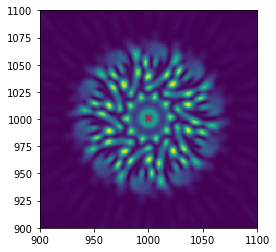

In [7]:
# Check the rough centring
im,header = fits.getdata(sim_dir+'0.fits',header=True)
cen = rough_centre(im,search_radius = 3,skip=1)
# plt.imshow(conv)
# plt.show()
plt.imshow(im)
plt.xlim(900,1100)
plt.ylim(900,1100)
# plt.plot(im.shape[1]//2,im.shape[0]//2,'ko')
plt.plot(im.shape[1]//2-cen[1],im.shape[0]//2-cen[0],'rx')

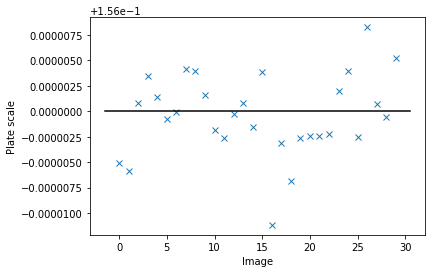

`xtol` termination condition is satisfied.
Function evals: 6
Done 29 : [1.56005261e-01 8.05558734e+00 5.79220558e+03 1.74436850e-01
 1.02778840e-01 1.45015381e+00]
CPU times: user 2h 22min 48s, sys: 1min 30s, total: 2h 24min 18s
Wall time: 2h 21min 27s


In [43]:
%%time
from IPython.display import clear_output

# Loop through the images
psf_radius = 8.053
# Plate scale, PSF radius, teff, flux, xcen,ycen, filter centre, RV (km/s)
starting_params = [pscale,psf_radius,5790,0.19,0,0]#,550e-9,-22.3] 
starting_params = np.array(starting_params)

wdir = '/Users/cheetham/code/toliman/Toliman/Sidelobe_fit/sims/jitter_3.5k/'
ims = glob.glob(wdir+'*.fits')
ims.sort()
n = len(ims)

best_fit_params = np.zeros((n,starting_params.size))

for ix,fn in enumerate(ims):
    
    # Load and normalize by peak on one sidelobe
    im = fits.getdata(fn)
    im = im/np.max(im[0:500,0:500])
    
    # Get a rough centre position
    cen = rough_centre(im,search_radius = 3,skip=1)
    
    params = starting_params
    
    # Any keywords that are in this dictionary will not be fit!
    kw = {'image':im,'cutout_sz':100,'wavs':wavs,'aperture':composite,'mask':mask}
    kw['filter_centre'] = 550e-9 # fix it!
    kw['RV'] = -22.3 # fix it!
#     kw['filter_n'] = 2
#     kw['filter_sigma'] = 105e-9
    
    min_bounds = [0.15,7,5700,0.,-50,-50]#,540e-9,-22.6]
    max_bounds = [0.16,9,5900,np.inf,50,50]#,560e-9,-22.0]
    
    bounds=(min_bounds,max_bounds)
    
#     resids = poppy_model.airy_model_residuals(params,image=im,cutout_sz=100,wavs=wavs,aperture=composite)
#     resids_2d = np.reshape(resids,im.shape)
#     plt.imshow(resids_2d*mask,vmin=-1e-1,vmax=1e-1)
    
    fit = scipy.optimize.least_squares(poppy_model.airy_model_residuals,params,method='trf',
                                       ftol=None,xtol=1e-7,kwargs=kw,bounds=bounds)
    best_fit_params[ix] = fit.x
    
    clear_output(wait=True)
    plt.plot(best_fit_params[:ix+1,0],'x');plt.xlabel('Image');plt.ylabel('Plate scale')
    plt.plot(plt.xlim(),[pscale,pscale],'k')
    plt.show()

    print(fit.message)
    print('Function evals:',fit.nfev)
    print('Done',ix,':',fit.x)

Plate scale: 0.156000 +/- 0.000004.  Error: 2.51 +/- 25.12ppm
PSF width: 8.06665 +/- 0.0063051
Teff: 5792.538998 +/- 6.653627.  Error: -438.51 +/- 1149.16ppm
Flux: 0.176934 +/- 0.00352408


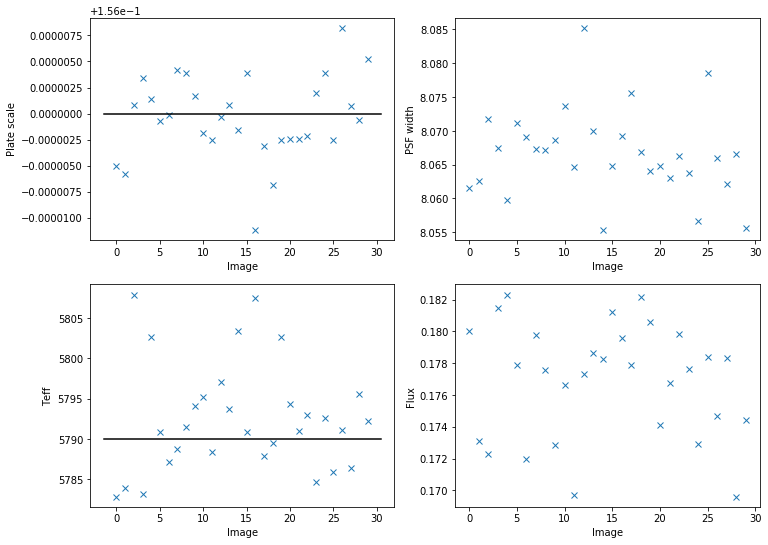

In [44]:
# Plot the parameters
fig,axs = plt.subplots(2,2,clear=True,figsize=(12,9))
((ax1,ax2),(ax3,ax4)) = axs

params = ['Plate scale','PSF width','Teff','Flux']
actual_vals = [pscale,None,header['primary_teff'],None]
for ix,ax in enumerate([ax1,ax2,ax3,ax4]):
    ax.plot(best_fit_params[:,ix],'x')
    
    actual_val = actual_vals[ix]
    if actual_val is not None:
        ax.plot(ax.get_xlim(),[actual_val,actual_val],'k')
        
    ax.set_xlabel('Image')
    ax.set_ylabel(params[ix])
    
    val = np.mean(best_fit_params[:,ix])
    err = np.std(best_fit_params[:,ix])
    
    if actual_val is not None:
        line = '{0}: {1:.6F} +/- {2:.6F}.  Error: {3:.2F} +/- {4:.2F}ppm'
        print(line.format(params[ix],val,err,(actual_vals[ix]-val)/actual_vals[ix]*1e6,err/actual_vals[ix]*1e6))
    else:
        line = '{0}: {1:.6} +/- {2:.6}'
        print(line.format(params[ix],val,np.std(best_fit_params[:,ix])))


In [45]:
# How does Teff convert into central wavelength change?
eff_waves = np.zeros(best_fit_params.shape[0])
for ix in range(best_fit_params.shape[0]):
    measured_teff = best_fit_params[ix,2]
    
    measured_z = 0.2
    measured_logg = 4.3
    acenA = S.Icat('phoenix',measured_teff,measured_z,measured_logg)

    specA = acenA.sample(wavs*1e10) # This needs angstroms as input

    # Find the mean wavelength
    eff_wave = np.sum(specA*wavs)/np.sum(specA)
    eff_waves[ix] = eff_wave
    
# What should it be?
acenA = S.Icat('phoenix',header['primary_teff'],header['primary_z'],header['primary_logg'])
specA = acenA.sample(wavs*1e10) # This needs angstroms as input
actual_eff_wave = np.sum(specA*wavs)/np.sum(specA)*1e9

val = np.mean(eff_waves)*1e9
err = np.std(eff_waves)*1e9

line = '{0}: {1:.6F} +/- {2:.6F}.  Error: {3:.2F} +/- {4:.2F}ppm'
print(line.format('Wave',val,err,(actual_eff_wave-val)/actual_eff_wave*1e6,err/actual_eff_wave*1e6))

Wave: 549.789531 +/- 0.008830.  Error: 5.62 +/- 16.06ppm


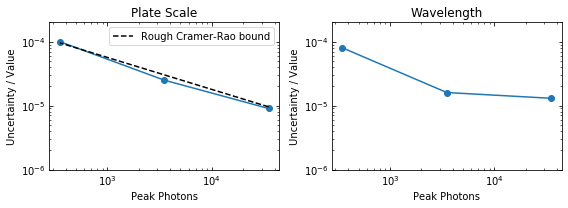

In [10]:
# A plot of the results with photon noise vs number of photons
# The Cramer-Rao bound plotted is a rough approximation by assuming that the plate scale is 
#  measured from the distance between two opposite sidelobes, and then combined from the two diagonal measurements
photons = [35000,3500,350]
ps_err=  np.array([9,25,99.9])
cramer_rao_ps_err = np.array([9.56,30.25,95.65])
wave_err = np.array([13.,16,80])
labels=['Measured accuracy','Measured accuracy']

plt.figure(figsize=(8,3))
for ix in range(2):
    plt.subplot(1,2,ix+1)
    plt.plot(photons,[ps_err,wave_err][ix]*1e-6,'-o')#,label=labels[ix])
    if ix  == 0:
        plt.plot(photons,cramer_rao_ps_err*1e-6,'k--',label='Rough Cramer-Rao bound')
        plt.legend()
    plt.xlabel('Peak Photons')
    plt.ylabel('Uncertainty / Value')
    plt.title(['Plate Scale','Wavelength'][ix])
    plt.ylim(1e-6,2e-4)
    plt.xscale('log')
    plt.yscale('log')
    plt.gca().tick_params(axis='both',which='both',direction='in',top=True,right=True)
plt.tight_layout()
plt.savefig('/Users/cheetham/Google Drive/Backup/astro_things/reports/toliman/plate_scale_photon_noise_with_cramer_rao.pdf')